## MNIST

In [41]:
import numpy as np

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [4]:
type(mnist)

sklearn.utils.Bunch

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X = mnist["data"]

In [6]:
y = mnist["target"]

In [7]:
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
28 * 28

784

In [10]:
import matplotlib.pyplot as plt

In [33]:
some_digit = X[0]

In [34]:
some_digit_img = some_digit.reshape(28, 28)

In [35]:
some_digit_img.shape

(28, 28)

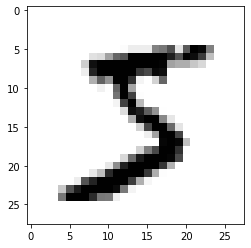

In [36]:
plt.imshow(some_digit_img, cmap="binary")

In [39]:
y[0]

'5'

In [42]:
y = y.astype(np.uint8)

In [43]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [45]:
(y_train == 0).sum()  # 60000개의 훈련 데이터 중에 0의 갯수는 5923개

5923

## 이진 분류

In [48]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [49]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [50]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [51]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [52]:
(y_train_5 == 1).sum()

5421

In [53]:
(y_train_5 == 0).sum()

54579

In [ ]:
# 불균형한 데이터셋에 대해서는 정확도가 성능 측정 지표가 안된다

In [ ]:
X_train, y_train

In [56]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [57]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [59]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [61]:
y_train_pred.shape

(60000,)

In [62]:
from sklearn.metrics import confusion_matrix

In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [63]:
confusion_matrix(y_train_5, y_train_pred )

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [64]:
(53892 + 3530) / (53892 + 687 + 1891 + 3530)

0.9570333333333333

In [ ]:
precision (정밀도)

In [65]:
3530 / (687 + 3530)

0.8370879772350012

In [68]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
recall (재현율)

In [66]:
3530 / (1891 + 3530)

0.6511713705958311

In [69]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [71]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [72]:
#y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [73]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [74]:
from sklearn.metrics import precision_recall_curve

In [118]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

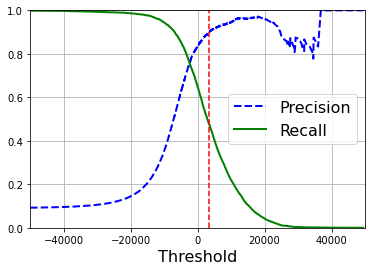

In [128]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.axvline(x = threshold_90_precision, color="r", linestyle="--") 

    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])   
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [ ]:
# 정밀도 90% 이상을 목표로 하고 싶을 때

In [131]:
precisions[-1]

1.0

In [132]:
np.argmax(precisions >= 0.90)

57075

In [133]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [134]:
threshold_90_precision

3370.0194991439557

In [135]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [136]:
(y_scores > threshold_90_precision)

array([False, False, False, ...,  True, False, False])

In [137]:
y_train_predict_90 = (y_scores > threshold_90_precision)

In [138]:
y_train_predict_90

array([False, False, False, ...,  True, False, False])

In [139]:
precision_score(y_train_5, y_train_predict_90)

0.9

In [140]:
recall_score(y_train_5, y_train_predict_90)

0.47980077476480354

In [141]:
from sklearn.metrics import plot_precision_recall_curve

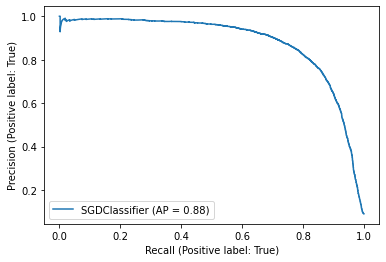

In [142]:
plot_precision_recall_curve(sgd_clf, X_train, y_train_5)

* ROC 곡선

In [143]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

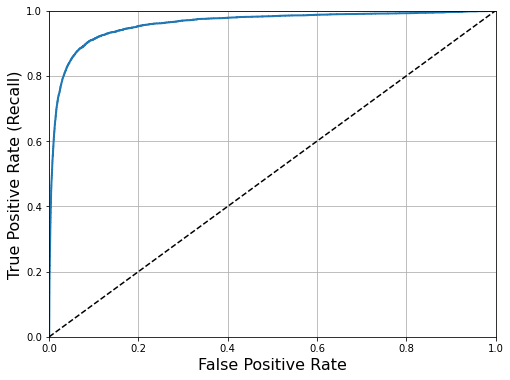

In [144]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.show()

In [145]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [147]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [152]:
y_scores.shape

(60000,)

In [151]:
y_scores_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [153]:
y_scores_forest.shape

(60000, 2)

In [155]:
y_scores_forest = y_scores_forest[:, 1]

In [159]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

In [161]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

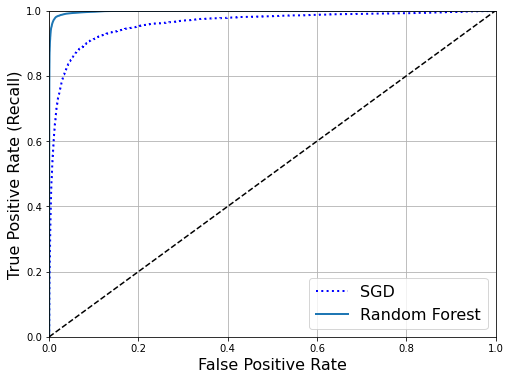

In [162]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

In [163]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [164]:
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [165]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

## 다중 분류

* SVC

In [167]:
from sklearn.svm import SVC

In [169]:
svm_clf = SVC(gamma="auto", random_state=42)

In [170]:
svm_clf.fit(X_train[:1000], y_train[:1000])

SVC(gamma='auto', random_state=42)

In [173]:
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [176]:
some_digit_scores = svm_clf.decision_function([some_digit])

In [177]:
np.argmax(some_digit_scores)

5

In [178]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [179]:
svm_clf.classes_[5]

5

* SGDClassifer

In [180]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [181]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [182]:
from sklearn.preprocessing import StandardScaler

In [183]:
X_train[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [185]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [188]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [189]:
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

In [190]:
import seaborn as sns

<AxesSubplot:>

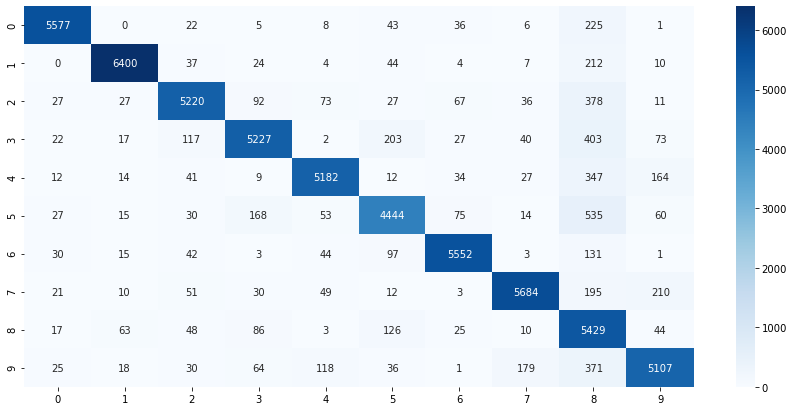

In [194]:
plt.figure(figsize=(15, 7))
sns.heatmap(conf_mx, cmap="Blues", annot=True, fmt='.0f')

In [196]:
row_sums = conf_mx.sum(axis=1)

In [197]:
norm_conf_mx = conf_mx / row_sums

<AxesSubplot:>

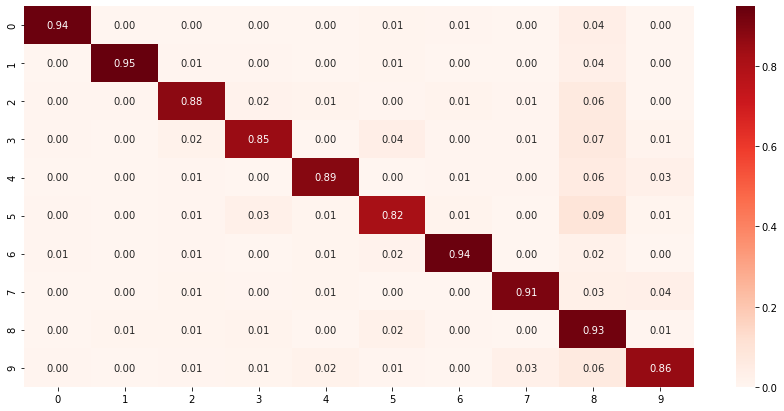

In [200]:
plt.figure(figsize=(15, 7))
sns.heatmap(norm_conf_mx, cmap="Reds", annot=True, fmt='.2f')